# Praca domowa - Statystyczne Reguły Decyzyjne

student: Marta Wardzińska, 
student ID: 84473
    

## 1. Cel i opis zadania

	
    
 Duża firma o nazwie XYZ zatrudnia w danym momencie około 4000 pracowników. Jednak każdego roku około 15% pracowników odchodzi z firmy. Zarząd uważa, że odejście pracowników na własną rękę lub z powodu ich zwolnienia jest niekorzystne dla firmy z następujących powodów:
 - Projekty byłych pracowników ulegają opóźnieniu, co utrudnia dotrzymanie terminów i powoduje utratę reputacji wśród konsumentów i partnerów
 - Dział HR musi być większy w celu rekrutacji nowych talentów
 - Najczęściej nowi pracownicy muszą być przeszkoleni do pracy i / lub mieć czas na aklimatyzację w firmie
 
	Celem przedstawionej pracy jest zaproponowanie modelu przewidującego prawdopodobieństwo odejścia pracownika z pracy. Dane użyte do zadania znajdują się na stronie:
https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study#general_data.csv


In [295]:
#import bibliotek
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("dark")

#Wczytanie danych
df = pd.read_csv("C:/Users/martawa/Desktop/SGH sem3/SRD/projekt/hr-analytics-case-study/general_data.csv",sep=",")

## 2. Zbiór danych do modelu

### 2.1. Przygotowanie i wstępna analiza zbioru danych

Analizowany zbiór danych HR zawiera 4410 obserwacji o podstawowych informacjach dotyczących pracowników. Zmienne znajdujące się w modelu przedstawiono poniżej.

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [297]:
#Zrzut reprezentujący część zmiennych
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Jako pierwszy krok analizy, niezbędna była weryfikacja braku danych. W zbiorze danych wykryto 19 braków danych dotyczących zmiennej NumCompaniesWorked oraz 9 braków danych w zmiennej TotalWorkingYears. 

Braki zostały usunięte przez usunięcie tych jednostek obserwacji z analizy. 

Po usunięciu zmiennych w modelu zostało 4382 obserwacji. W zbiorze nie zidentyfikowano również zmiennych odstających, które mogłyby mieć znaczący wpływ na model.

In [298]:
#Braki danych 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [299]:
df= df.dropna() 
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [300]:
Attrition = df.groupby('Attrition')
Attrition.mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,37.567038,9.232527,2.920044,1.0,2210.377482,2.069894,65684.209954,2.646451,15.157465,8.0,0.797661,11.868643,2.825129,7.367419,2.236062,4.367963
Yes,33.628369,9.024113,2.872340,1.0,2194.387234,2.032624,61814.950355,2.937589,15.487943,8.0,0.778723,8.273759,2.658156,5.148936,1.960284,2.865248


Zmienną zależną w zbiorze danych jest zmienna "Attrition" przyjmująca dwie wartości: "Yes" lub "No" mówiące o odejściu pracownika z firmy w przeciągu ostatniego roku. Na poniższym wykresie można zauważyć dużą różnicę między ilością danych wartości, ok 75% wartości stanowi informacja o aktualnie zatrudnionych.

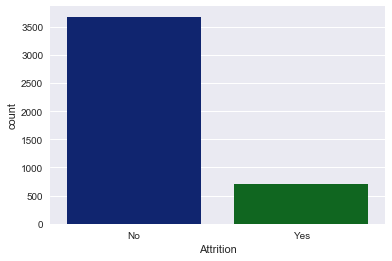

In [301]:
sns.countplot(x = "Attrition",data=df)
plt.show()

Następnie przystąpiono do analizy zmiennych w celu lepszego zrozumienia zbioru danych. Poniżej zaprezentowano przykładowe wykresy:

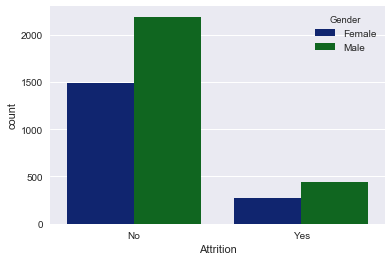

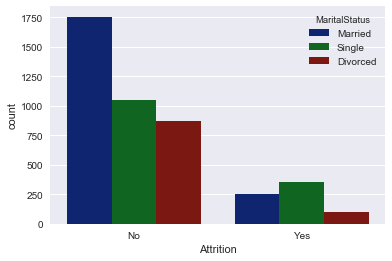

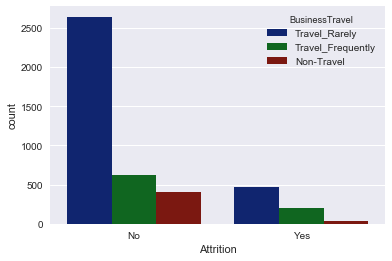

In [302]:
#wykresy 
sns.countplot(x = "Attrition",data=df,hue="Gender")
plt.show()

sns.countplot(x = "Attrition",data=df,hue="MaritalStatus")
plt.show()

sns.countplot(x = "Attrition",data=df,hue="BusinessTravel")
plt.show()

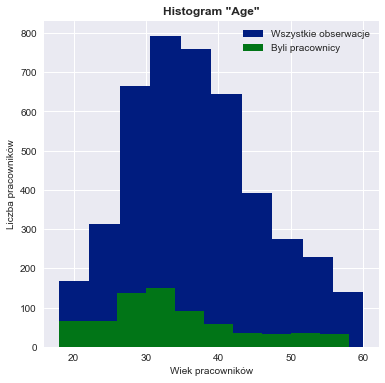

In [303]:
plt.figure(figsize=[6,6])
plt.hist(x=df['Age'], label='Wszystkie obserwacje')
plt.hist(x=df[df['Attrition']=='Yes']['Age'],label='Byli pracownicy');
plt.legend()
plt.title('Histogram "Age"',size=12,fontweight='bold');
plt.ylabel('Liczba pracowników',size=10);
plt.xlabel('Wiek pracowników',size=10);

Zmienna Age została w kolejnych krokach podzielona na 4 grupy: <=30 lat, 31-40 lat, 41-50 lat, >50 lat

Utworzono macierz rozproszenia prezentującą związki między parami poszczególnych cech dla danego zestawu danych (Age, MonthlyIncome, DistanceFromHome):

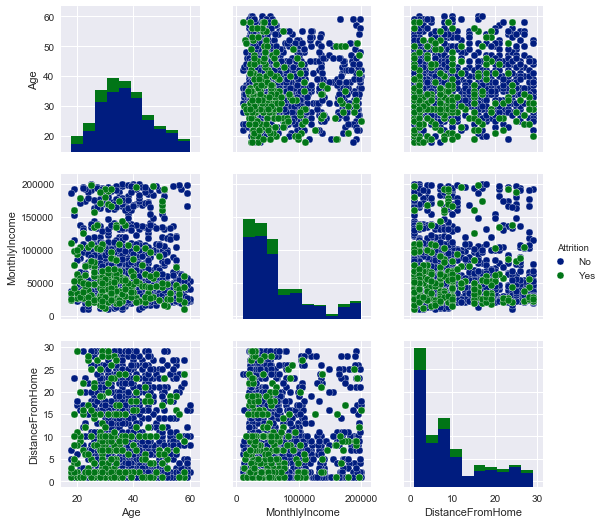

In [304]:
sns.pairplot(df[['Age','MonthlyIncome','DistanceFromHome','Attrition']],hue = 'Attrition')

In [305]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.00,7.0,14.00,29.0
Education,4382.0,2.912369,1.024728,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4382.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4382.0,2207.804884,1271.688783,1.0,1108.25,2208.5,3308.75,4409.0
JobLevel,4382.0,2.063898,1.106115,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4382.0,65061.702419,47142.310175,10090.0,29110.00,49190.0,83790.00,199990.0
NumCompaniesWorked,4382.0,2.693291,2.497832,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4382.0,15.210634,3.663007,11.0,12.00,14.0,18.00,25.0
StandardHours,4382.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


Po  analizie zbioru postanowiono usunąć zmienne: 'EmployeeCount', 'EmployeeID', 'StandardHours', 'Over18' . Zmienne te zawierały informacje nie wnoszące wartości do modelu.

In [306]:
print(df['Over18'].value_counts())

Y    4382
Name: Over18, dtype: int64


In [307]:
df.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1, inplace = True)

### 2.2. Kodowanie zmiennych

Część ze zmiennych jakościowych wymagała zakodowania przedstawionej w niej informacji. Zmienne te to: Department, EducationField, Gender, JobRole, MaritalStatus. Kategoryzacja w tym przypadku pozwala zakodować wartości danej kategorii jako numeryczne identyfikatory.

In [308]:
#grupowanie zmiennej - Age
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe
Age(df); 

In [309]:
#Kodowanie zmiennych
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['BusinessTravel'] = labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department'] = labelEncoder_X.fit_transform(df['Department'])
df['EducationField'] = labelEncoder_X.fit_transform(df['EducationField'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['JobRole'] = labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelEncoder_X.fit_transform(df['MaritalStatus'])

#Attriton - zmienna zalezna
label_encoder_y=LabelEncoder()
df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])


df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,2,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,2,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,2,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,2,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


### 2.3 Macierz korelacji

Utworzona macierz korelacji pozwala na określanie zależności liniowych pomiędzy zmiennymi.


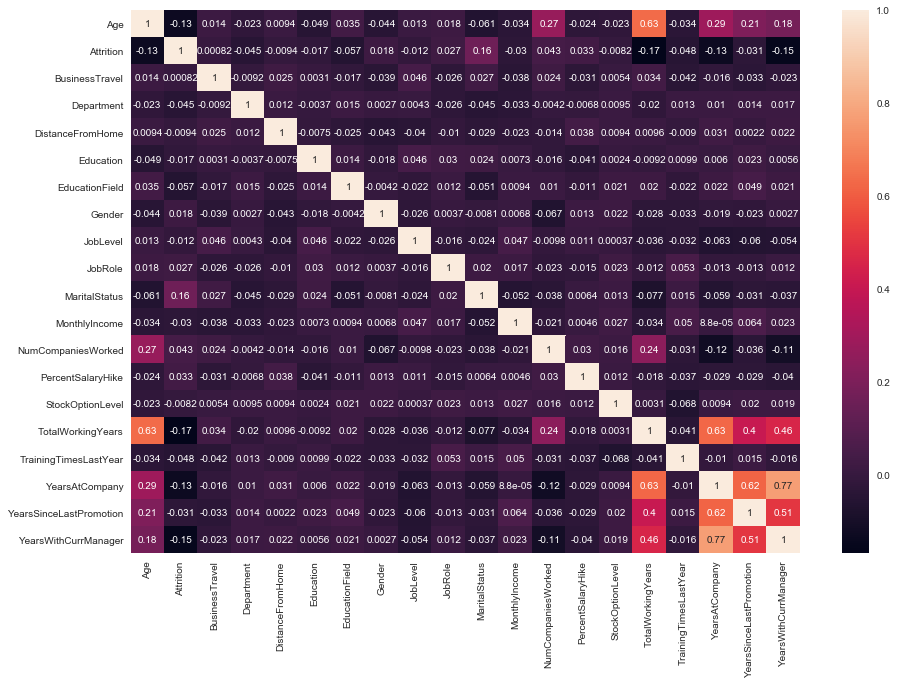

In [310]:
#Macierz korelacji

CORREL = df.corr().sort_values('Attrition')
CORREL['Attrition']

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(15,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

W omawianych w dalszej części pracy modelu regresji logistycznej pozostałe zmienne nie zostały usunięte ze względu na założenia projektu.	

## 3. Podział zbioru danych

Ustanowiwszy parametr train_size=0.7, przydzielono 30% danych do zmiennych X_test i y_test, a pozostałe 70% próbek zostało przeniesionych do X_train i y_train.

Drzewa decyzyjne i lasy losowe to dwa z niewielu algorytmów uczenia maszynowego, w których nie trzeba martwić się skalowaniem danych ponieważ są one niezależne od skali. Regresja logistyczna działa jednak skuteczniej, jeżeli cechy są dopasowane do jednakowej skali,  przed jej dokonaniem przeprowadzono standaryzację cech za pomocą klasy StandardScaler.


In [311]:
#Podzial zbioru danych
y = df['Attrition']
x = df.drop('Attrition', axis = 1)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, train_size = 0.70)

E:\python\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [312]:
print('Liczba etykiet w zbiorze y_train:', np.bincount(y_train))

Liczba etykiet w zbiorze y_train: [2589  478]


In [313]:
print('Liczba etykiet w zbiorze y_test:', np.bincount(y_test))

Liczba etykiet w zbiorze y_test: [1088  227]


In [314]:
#Skalowanie
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

## 4. Dobór metryki wg. której ocenione zostaną modele.

Analizując strukturę danych i cel dotyczący efektywnego wykrywanie osób mogących odejść z pracy do oceny predykcji modelu posłuży krzywa ROC oraz macierz pomyłek.

Wykresy krzywej ROC są bardzo dobrymi narzędziami doboru modelu klasyfikującego, które bazują na jego skuteczności obliczonej na podstawie odsetka fałszywie pozytywnych (FP) i prawdziwie pozytywnych (TP), które wyliczamy poprzez przesunięcie progu decyzyjnego klasyfikatora. Przekątną krzywej ROC możemy interpretować jako losowe zgadywanie, a skuteczność modeli klasyfikujących znajdujących się pod obszarem tej przekątnej jest uznawana za gorszą od zgadywania. Idealny klasyfikator znajdowałby się w lewym górnym rogu wykresu. Na podstawie tej krzywej możemy obliczyć obszar pod krzywą ROC (ang. area under the curve — AUC) opisujący skuteczność modelu klasyfikatora. W AUC zawarty jest opis precyzji detekcji w całym zakresie pracy systemu. Ponadto sprawdzenie skuteczności klasyfikatora jako obszaru pod krzywą ROC pozwala obserwować jego skuteczność wobec niezrównoważonych próbek.
Ocenę i prezentację wyników klasyfikacji ułatwi interpretacja confusion matrix.

In [315]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss


## 5. Model I - Regresja Logistyczna

Następnym krokiem było oszacowanie prostej regresji logistycznej bez regularyzacji i usuwania zmiennych z modelu.
Wyznaczono:
    
a)  Accuracy_score(ang. accuracy - dokładność) dla przyjętego modelu 

In [229]:
#Model nr 1 - Regresja logistyczna 
#confusion_matrix - ocena dokładności klasyfikacji
#accuracy_score - wynik dokładności

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Nieprawidłowo sklasyfikowane próbki: %d' % (y_test != y_pred).sum())
print('Dokładność: %.2f' % accuracy_score(y_test, y_pred))

Nieprawidłowo sklasyfikowane próbki: 224
Dokładność: 0.83


b) Sprawdzian krzyżowy

In [230]:
#cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv=10)
scores

print('Wyniki dokładności sprawdzianu: %s' % scores)
print('Dokładność sprawdzianu: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Wyniki dokładności sprawdzianu: [0.8538961  0.84415584 0.84090909 0.84690554 0.84640523 0.84640523
 0.84640523 0.85294118 0.8496732  0.84640523]
Dokładność sprawdzianu: 0.847 +/- 0.004


c) Macierz pomyłek (confusion matrix) pozwala na określenie skuteczności modelu. Dane zawarte w macierzy informują nas o różnych rodzajach błędów popełnionych przez klasyfikator podczas analizy zestawu testowego. W modelu otrzymano następujące wartości (dla progu odcięcia 0,5): 


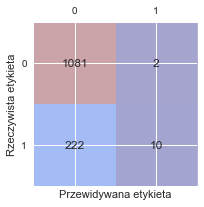

In [231]:
#Wizualizacja macierzy pomyłek

confmat=(confusion_matrix(y_test,y_pred))

fig,ax = plt.subplots(figsize=(3,3))
ax.matshow(confmat, cmap=plt.cm.jet, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
         ax.text(x=j, y=i,
                 s=confmat[i, j],
                 va='center', ha='center')
plt.xlabel('Przewidywana etykieta')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Rzeczywista etykieta')

plt.show()

d) Następnie wygenerowano raport zawierający informacje dot. precision, recall, f1-score, support. Precyzja (precision) i pełność (recall) to metryki wydajności powiązane z odsetkiem prawdziwie pozytywnych oraz prawdziwie negatywnych. Kombinacja precyzji i pełności to tzw. wynik F1. Wartości przedstawione w wygenerowanym raporcie znajdują się poniżej:

In [232]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      1083
          1       0.83      0.04      0.08       232

avg / total       0.83      0.83      0.76      1315



In [233]:
prob1=logreg.predict_proba(X_test)[:,1]

In [234]:
#Krzywa ROC 

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [235]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='navy', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Odsetek fałszywie pozytywnych')
    plt.ylabel('Odsetek prawdziwie pozytywnych')
    plt.title('Krzywa ROC ')
    plt.legend()
    plt.show()

auc = roc_auc_score(y_test, prob1)
fpr, tpr, threshold = metrics.roc_curve(y_test, prob1)
roc_auc = metrics.auc(fpr, tpr)

e) Wygenerowano krzywą ROC.
Na poniższym wykresie oś Ox reprezentuje 1-specyfczność, natomiast oś Oy reprezentuje czułość.
Na podstawie krzywej obliczono obszar pod krzywą ROC (ang. area under the curve — AUC).

AUC: 0.72


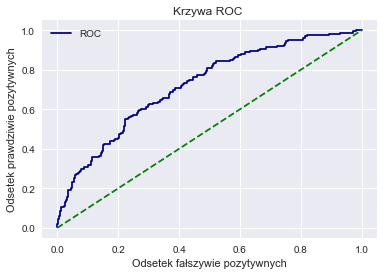

In [236]:
print('AUC: %.2f' % auc)
plot_roc_curve(fpr, tpr)

#### Ocena modelu dla progu odcięcia 0,5

AUC mówi nam o tym iż model będzie miał podany wyżej procent szans na poprawne rozróżnienie klas 0 i 1.
Skuteczność modelu dla analizowanego zagadnienia może być sklasyfikowana jako dobra.

e) Próg odcięcia J- Youdena

Kolejnym krokiem analizy było zoptymalizowanie progu odcięcia, wybierając taki dla którego wartość statystyki J Youdena:

				J=TPR+TNR−1
                
jest najwyższa.


In [237]:
#Optymalizacja progu odciecia, J Youdena

def Youden_J(y_test, prob1):
    
    fpr, tpr, threshold = roc_curve(y_test, prob1)

    spc = 1-fpr;
    j_scores = tpr-fpr
    best_youden, youden_thresh, youden_sen, youden_spc = sorted(zip(j_scores, threshold, tpr, spc))[-1]

    predicted_label = copy.deepcopy(prob1)
    predicted_label[predicted_label>youden_thresh] = 1
    predicted_label[predicted_label<youden_thresh] = 0
  
    auc = roc_auc_score(y_test, prob1)
    
    return auc, best_youden, youden_thresh

- Otrzymane wartości kolejno: AUC, best Youden, próg odcięcia :

In [238]:
Youden_J(y_test, prob1)

(0.7210932276244151, 0.3301174897315885, 0.21538385177675526)

- Jakość predykcji dla progu optymalnego Youdena:

In [239]:
# confushion_matrix z pkt.odciecia
def conf_matrix(prob1, values, treshold):
    predicted_values = np.where(prob1 > treshold, 1, 0)
    matrix = confusion_matrix(values, predicted_values) 
    return matrix

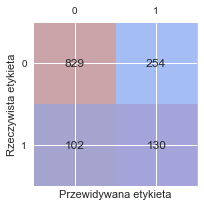

In [240]:
confmatJ1=(conf_matrix(prob1,y_test, 0.22))

fig,ax = plt.subplots(figsize=(3,3))
ax.matshow(confmatJ1, cmap=plt.cm.jet, alpha=0.3)
for i in range(confmatJ1.shape[0]):
    for j in range(confmatJ1.shape[1]):
         ax.text(x=j, y=i,
                 s=confmatJ1[i, j],
                 va='center', ha='center')
plt.xlabel('Przewidywana etykieta')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Rzeczywista etykieta')

plt.show()

- Precision, sensitivity oraz specifity:

In [241]:
def precision(prob1,values, treshold):
    matrix = conf_matrix(prob1,values, treshold)
    return matrix[1,1] / (matrix[1,1] + matrix[0,1])

In [352]:
precision(prob1,y_test, .33)

0.168141592920354

In [243]:
def sensitivity(prob_predicted,values, treshold):
    matrix = conf_matrix(prob_predicted,values, treshold)
    return matrix[1,1] / (matrix[1,0] + matrix[1,1])

In [353]:
sensitivity(prob1,y_test, 0.33)

0.08370044052863436

In [245]:
sensitivity(prob1, y_test, 0.22)

0.5603448275862069

In [246]:
def specifity(prob_predicted,values, treshold):
    matrix = conf_matrix(prob_predicted,values, treshold)
    return matrix[0,0] / (matrix[0,0] + matrix[0,1])

In [247]:
specifity(prob1, y_test, 0.5)

0.9981532779316713

In [248]:
specifity(prob1, y_test, 0.22)

0.765466297322253

In [249]:
def f_beta(prob_predicted,values, beta, treshold):
    rec = sensitivity(prob_predicted,values, treshold)
    prec = precision(prob_predicted,values, treshold)
    return 2 * prec * rec / (beta*prec + rec)

In [250]:
f_beta(prob1,y_test,1,0.22)

0.42207792207792205

#### Ocena modelu dla progu odcięcia J-Youdena

Dla progu odcięcia optymalnego wyniki poprawiły się. Zwiększeniu uległa wartość sensitivity (czułości modelu), a co za tym idzie zmniejszeniu uległa wartość specificity. Zwiększyła się dokładność prawdziwie negatywnych klasyfikacji i zmalała ilość klasyfikacji fałyszywie pozytywnych. Jakość predykcji wzrosła.

## 6.  Model II - Las losowy

Jako model II wybrano las losowy. Najpierw uruchomiono model bez definiowania hiperparametrów.


In [324]:
#Model nr 2 - Las Losowy
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = forest.predict(X_test)

print('Nieprawidłowo sklasyfikowane próbki: %d' % (y_test != y_predF).sum())
print('Dokładność: %.2f' % accuracy_score(y_test, y_predF))
print(confusion_matrix(y_test,y_predF))

Nieprawidłowo sklasyfikowane próbki: 42
Dokładność: 0.97
[[1085    3]
 [  39  188]]


wygenerowano raport zawierający informacje dot. precision, recall, f1-score, support. 

In [325]:
print(classification_report(y_test,y_predF))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1088
          1       0.98      0.83      0.90       227

avg / total       0.97      0.97      0.97      1315



Aby sprawdzić, czy tuning hiperparametrów polepszy wynik modelu zastosowano metodę przeszukiwania siatki (GridSearchCV). Do parametru hyperF  przydzielono listę słowników zawierającą hiperparametry do strojenia. 
	Po ponownym uruchomieniu modelu z hiperparametrami dobranymi za pomocą przeszukiwania siatki okazało się iż model nie uległ poprawie.


In [326]:
#Tuning hyperparametrów
from sklearn.model_selection import GridSearchCV

n_estimators = [5, 10, 100, 300]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  1.2min finished


In [327]:
print(bestF)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 100, 300], 'max_depth': [5, 8, 15, 25], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)


In [328]:
#Random forest z hiperparametrami wg optymalizacji
forestOpt = RandomForestClassifier(random_state = 1, criterion='gini', n_estimators = 10, min_samples_split = 2, min_samples_leaf = 1)
                                   
forestOpt.fit(X_train, y_train)
y_pred2 = forestOpt.predict(X_test)
prob2=forestOpt.predict_proba(X_test)[:,1]

Sprawdzian krzyżowy

In [329]:
#cross-validation
scores = cross_val_score(forestOpt, X_train, y_train, cv=10)
scores

print('Wyniki dokładności sprawdzianu: %s' % scores)
print('Dokładność sprawdzianu: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Wyniki dokładności sprawdzianu: [0.97068404 0.95765472 0.96091205 0.97394137 0.97068404 0.95439739
 0.95765472 0.95114007 0.97058824 0.96393443]
Dokładność sprawdzianu: 0.963 +/- 0.008


a) Istotność cech wg modelu

 0) MonthlyIncome                  0.105025
 1) DistanceFromHome               0.080279
 2) YearsAtCompany                 0.076434
 3) TotalWorkingYears              0.075307
 4) NumCompaniesWorked             0.070896
 5) PercentSalaryHike              0.065369
 6) JobRole                        0.057841
 7) YearsWithCurrManager           0.051831
 8) Attrition                      0.050129
 9) TrainingTimesLastYear          0.047986
10) YearsSinceLastPromotion        0.047568
11) JobLevel                       0.044913
12) MaritalStatus                  0.043127
13) Education                      0.039314
14) EducationField                 0.038689
15) BusinessTravel                 0.031945
16) StockOptionLevel               0.029722
17) Department                     0.023972
18) Gender                         0.019653


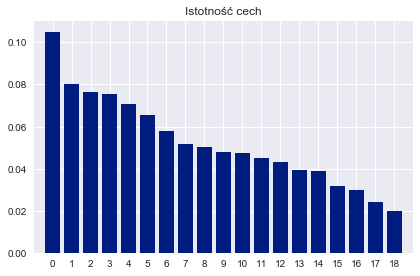

In [330]:
#Wizualizacja istotności cech wg modelu
feat_labels = df.columns[1:]
importances = forestOpt.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f, 30,
                        feat_labels[indices[f]],
                        importances[indices[f]]))
plt.title('Istotność cech')
plt.bar(range(X_train.shape[1]),
        importances[indices], 
        align='center')
plt.xticks(range(X_train.shape[1]))
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
           
plt.show()

b) Accuracy_score(ang. accuracy - dokładność) dla przyjętego modelu.

In [331]:
print('Dokładność: %.2f' % accuracy_score(y_test, y_pred2))

Dokładność: 0.97


c) Dane zawarte w macierzy informują nas o różnych rodzajach błędów popełnionych przez klasyfikator podczas analizy zestawu testowego. W modelu otrzymano następujące wartości (dla progu odcięcia 0,5): 

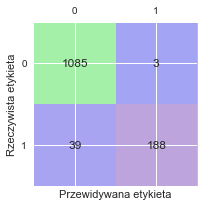

In [332]:
#Brak zmiany?

confmat2=(confusion_matrix(y_test,y_pred2))

fig,ax = plt.subplots(figsize=(3,3))
ax.matshow(confmat2, cmap=plt.cm.brg, alpha=0.3)
for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
         ax.text(x=j, y=i,
                 s=confmat2[i, j],
                 va='center', ha='center')
plt.xlabel('Przewidywana etykieta')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Rzeczywista etykieta')

plt.show()

d) wygenerowano raport zawierający informacje dot. precision, recall, f1-score, support. 

In [333]:
print(classification_report(y_test,y_pred2))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1088
          1       0.98      0.83      0.90       227

avg / total       0.97      0.97      0.97      1315



e) Krzywa ROC

AUC: 0.98


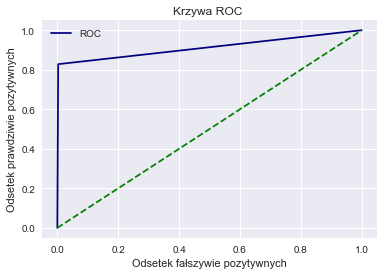

In [334]:
def plot_roc_curve2(fpr, tpr):
    plt.plot(fpr, tpr, color='navy', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Odsetek fałszywie pozytywnych')
    plt.ylabel('Odsetek prawdziwie pozytywnych')
    plt.title('Krzywa ROC ')
    plt.legend()
    plt.show()

auc = roc_auc_score(y_test, prob2)
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred2)
roc_auc = metrics.auc(fpr, tpr)


print('AUC: %.2f' % auc)
plot_roc_curve2(fpr, tpr)

#### Ocena modelu dla progu odcięcia 0,5

Powyższy wynik AUC opisuje skuteczność modelu lasu losowego. Wartość ta jest bardzo wysoka i mówi nam o szansie większej niż 95% na popawne sklasyfikowanie wartości pozytywnych i negatywnych.

f) Optymalizacja progu odcięcia J Youdena:

In [335]:
#Optymalizacja progu odciecia J Youdena
def Youden_J_RF(y_test, y_pred2):
    
    fpr, tpr, threshold = roc_curve(y_test, prob2)

    spc = 1-fpr;
    j_scores = tpr-fpr
    best_youden, youden_thresh, youden_sen, youden_spc = sorted(zip(j_scores, threshold, tpr, spc))[-1]

    predicted_label = copy.deepcopy(y_pred2)
    predicted_label[predicted_label>youden_thresh] = 1
    predicted_label[predicted_label<youden_thresh] = 0
  
    auc = roc_auc_score(y_test, y_pred2)
    
    return auc, best_youden, youden_thresh

- Wyniki dla: AUC, best Youden, próg odcięcia:

In [336]:
Youden_J_RF(y_test, y_predF)

(0.9127182398289713, 0.8902160533817052, 0.4)

- Precision, specifity oraz sensitivity dla progów 0.4 oraz 0.5:

In [349]:
precision(prob2,y_test, .89)

1.0

In [350]:
specifity(prob2,y_test, .89)

1.0

In [351]:
specifity(prob2,y_test, .89)

1.0

In [346]:
sensitivity(prob2,y_test, .4)

0.8766519823788547

In [347]:
sensitivity(prob2,y_test, .5)

0.8281938325991189

In [348]:
f_beta(prob2,y_test,1,0.4)

0.9149425287356322

- Confusion matrix dla modelu przy zoptymalizowanym progu odcięcia:

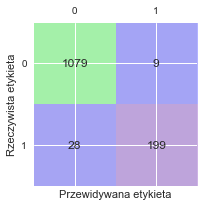

In [343]:
confmatJ2=(conf_matrix(prob2,y_test, 0.4))

fig,ax = plt.subplots(figsize=(3,3))
ax.matshow(confmatJ2, cmap=plt.cm.brg, alpha=0.3)
for i in range(confmatJ2.shape[0]):
    for j in range(confmatJ2.shape[1]):
         ax.text(x=j, y=i,
                 s=confmatJ2[i, j],
                 va='center', ha='center')
plt.xlabel('Przewidywana etykieta')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Rzeczywista etykieta')

plt.show()

#### Ocena modelu dla progu odcięcia J-Youdena

Dla progu odcięcia optymalnego wyniki poprawiły się w małym stopniu. Można przyjąć iż jakość modelu dla progu odcięcia Y-Joudena nie poprawiła się znacząco w porównaniu do progu 0,5.

## 7. Wnioski. Podsumowanie - porównanie modeli

Rozpatrując confusion_matrix dla zadanego problemu badawczego oraz porównując wyniki dla różnych progów odcięcia ważne jest  poleprzenie klasyfikacji TN (Osób, które odeszły z pracy i zostały poprawnie sklasyfikowane) oraz minimalizacja klasyfikacji FP (Osoby które odeszły z pracy, sklasyfikowane jako osoby nadal pracujące). 

W modelu regresji logistycznej wartości dla progu odcięcia Youdena w porównaniu z progiem odcięcia 0,5 zmieniła się następująco:
- TN wzrosło z 10 do 130 (prawdziwie negatywnych klasyfikacji)
- FP zmniejszyło się z 222 do 102 (fałszywie pozytywnych klasyfikacji)

tzn. dla progu odcięcia optymalnego wartości te znacznie się poprawiły.
Zmniejszenie progu odcięcia z 0,5 na próg optymalny Youdena powoduje znaczne zwiększenie sensitivity (czułości modelu), a co za tym idzie zmniejszenie specificity. Sensitivity wzrosło z 0,04 do 0,56.

FPR = 1- specifity w związku z czym zwiększenie wartości TPR (True Positive Rate) jest związane również ze zwiększeniem wartości FPR (False Positive Rate).

W modelu lasu losowego wartości dla progu odcięcia Youdena w porównaniu z progiem odcięcia 0,5 zmieniła się następująco:
- TN wzrosło z 188 do 199 (prawdziwie negatywnych klasyfikacji)
- FP zmniejszyło się z 39 do 238 (fałszywie pozytywnych klasyfikacji)

W modelu lasu losowego wyniki również uległy poprawie jednak zmiana nie jest tak duża, wynika to z tego że sam model przy progu odcięcia 0,5 ma już bardzo wysoką skuteczność i zmiana progu nieznacznie wpływa na jego polepszenie. Sensitivity oraz Specificity praktycznie się nie zmieniło.


W obu przypadkach próg odcięcia Youdena polepszył wyniki modelu, jednak w przypadku regresji logistycznej różnica jest znacznie większa. W przypadku modelu lasu losowego wyniki klasyfikacji przy obu progach są zbliżone. W obu przypadkach optymalny próg odcięcia jest<0.5.

Efektywniejszym modelem dla analizowanego zagadnienia w przypadku obu progów odcięcia będzie więc model lasu lasowego. Jego jakość predykcji jest wysoka.